# Single-Layer Networks

We have covered some of the limitations of single layer neural networks in class, but they are still powerful learning systems that provide a good way to begin learning about how to build neural networks using the `Keras` and `TensorFlow` tools.

So, let's see how we can load some data vectors in from a file, and learn something using a single-layer network!

We will start with a data set for classifying different species of iris plants based on size measurements taken from their flowers. The original data set can be found in the University of California, Irvine Machine Learning Reposity, which is linked to on the course website, but I've modified it just slightly for our purposes in this course.

First things first, let's grab the data to start working with it. For this, we need `pandas` and a URL for loading the data...

You can copy the URL for the data from [here](https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt)

In [1]:
# Load pandas
import pandas

# Load numpy too... we'll need it soon.
import numpy as np

In [2]:
# Load the Iris data set
# Note the header=None option...
data = np.array(pandas.read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt",
                                  delim_whitespace=True,
                                  header=None))

Pandas will return a special data structure that is capable of handling tables of mixed data types (strings, integers, floating point, etc.). However, this data set contains only numeric information (integers and floating point), making it reasonable for conversion into a numpy array. If we had a data set with mixed data types, we would need to work with the `pandas` data structure more closely to convert the non-numeric parts into vector-based encodings. The  vector encodings could then be used to provide this information to a neural network. We will revisit data encoding strategies at a later time, but for now we will stick to numeric data.

Let's take a quick look at the **shape** of this data:

In [3]:
# Shape information
print(data.shape)

(150, 5)


Typically, data sets will be arranged with one row per example. So for this data, we can assume there are 150 examples here (each is a set of measurements from a particular iris flower). Let's take a _slice_ of the data to see what it looks like:

In [4]:
# Slice just the first 3 examples
data[0:3,:]

array([[5.8, 2.7, 3.9, 1.2, 1. ],
       [6.9, 3.1, 5.4, 2.1, 2. ],
       [7.7, 3. , 6.1, 2.3, 2. ]])

You can notice here that we can use the `:` operator (`0:3`) to specify a list of rows that we would like to extract from the matrix. We can also specify the number of columns using a similar construct, but here we would like to look at **all** columns for these three rows. We just use the `:` operator alone to perform this operation. Any selection of items performed in this way is called a _slice_, and is useful for exploring large data sets or forming new arrays from subsets of other arrays.

For this data set, each example consists of a vector of _four_ features, and a _class label_ (five items total). Each of the four feature values are _continuous_ and the class labels are _discrete_. We can explore the data a little using the `unique()` function from numpy.

In [5]:
# Let's look at the last column only...
# .. and find the discrete set of items
# that it contains...
np.unique(data[:,4])

array([0., 1., 2.])

In [6]:
# Let's look at the other columns, too.
# First, the minimum and next the maximum...
print(np.min(data[:,0:4],axis=0))
print(np.max(data[:,0:4],axis=0))

[4.3 2.  1.  0.1]
[7.9 4.4 6.9 2.5]


The `unique()` function allows you to see the range of discrete values in an array. The 5th column of the data set contains only 0, 1, or 2. These are the _class labels_ for the examples. From a practical standpoint, these are the three different species of iris that we are wanting to classify. If you are interested in **exactly** which species the 0, 1, and 2 represent, please take a look at the details about the data set on the UCI repository page - [Link](http://archive.ics.uci.edu/ml/datasets/Iris). Understanding what the class labels correspond to in the real world might be important for understanding what our network is trying to tell us, a proper vector encoding of the class labels alone is sufficient for training a neural network.

The `min()` and `max()` functions allow us to explore the range for the four different measurements obtained from each flower. Each represents a measurement in centimeters for: sepal length, sepal width, petal length, and petal width. Again, this mapping becomes abstracted away since the neural network experiences the each flower as a vector of measurements.

At this time for simplicity, we will stick to the length-4 vector encoding of each flower. That is, the **training data** for the network that we will be building will just be all 150 vectors, each of length 4. We will store these **input vectors** in the matrix, $\boldsymbol{X}$:  

In [7]:
# Input training vectors
X = data[:,0:4]
X.shape

(150, 4)

$\boldsymbol{X}$ now contains all of the features for the 150 flowers we are going to try to classify using our neural network.

For the class labels, we will construct a set of **target vectors** that represent the human-labeled class assignments for the flowers. While we _could_ just let the network attempt to assign a 0, 1, or 2, there is more useful approach to take. This approach motivated by the idea of what kind of output a network should produce for a classification problem. In our case, if we left the class label vector as-is, the *target* vector for each flower would be a 1-dimensional vector (i.e. a single scalar value). Since we construct our network input and output _layers_ to have the same number of units as our input and target vectors, respectively, we would only use a single output unit. This _output unit_ would need to have activation function capable of representing the possible target values (0,1,2) which limits our choices. However, with a different **encoding** of the target vectors, this will no longer be an issue, and we will get some other benefits along the way.

Let's look at this method for transforming the class labels in detail:

In [8]:
## First, let's grab the class labels by themselves...
labels = data[:,4]

Now that we have the labels "in-hand" we will use some tools from the `keras` package (which relies on the `tensorflow` package) to create the encoding we would like to use. We will first load the tools, then create the set of target vectors, $\boldsymbol{Y}$ which we will be using for training our classifier:

In [9]:
# Keras/Tensorflow
import keras

Using TensorFlow backend.


In [10]:
# Convert the integer class labels to a
# categorical or "one-hot" encoding...
Y = keras.utils.to_categorical(labels,
                               len(np.unique(labels)))

# Encoded vector size?
print(Y.shape)

(150, 3)


In this operation, the integer class labels have been encoded into a 3-dimensional vector space. The `unique()` function was used to determine the number of unique integer labels in the vector, and the vector itself gets passed to the `to_categorical()` function to produce this encoding.

In [11]:
# Some particular examples...
print(labels[0])
print(Y[0,:])

print(labels[50])
print(Y[50,:])

print(labels[100])
print(Y[100,:])

1.0
[0. 1. 0.]
1.0
[0. 1. 0.]
0.0
[1. 0. 0.]


Above, I have pulled three examples to illustrate how the encoding scheme works. The `0` class label has now been mapped to the vector $[1,0,0]$, the label `1` has now been mapped to the vector $[0,1,0]$, and the label `2` has been mapped to the vector $[0,0,1]$. This is known as a categorical (or _one-hot_) encoding, and is a common way to represent discrete (i.e. integer) information to a neural network. In fact, it can sometimes be useful to perform a similary mapping for integer data that is provided as _input_ to a network as well, but we will save that for another day.

More importantly, since we now have vectors consisting only of scalar values in the range $[0,1]$, all typical activation functions that we have studied so far could be used since they can all produce output values in that same range (well, technically the acceptable range would be $(0,1)$ for the sigmoid function, for example, but it doesn't really matter much at the moment).

Now that we have a set of **input patterns**, $\boldsymbol{X}$, and a set of **target patterns**, $\boldsymbol{Y}$, we can use these vectors for training a neural network.

## Building a Single-Layer Network

Now that we have data ready for training, we just need to construct a network to learn how to to classify irises. The `keras` package provides the tools needed to set up such networks very quickly and start training them.

We will start by setting up a data structure that will contain our network, known as the _model_:

In [12]:
## Setting up a single-layer network
model = keras.Sequential()

We are using the `Sequential()` model which makes the assumtion that we would like to build a _feed-forward_ neural network architecture, which is what we have been focusing on so far in class.

Now that we have the container, let's create a single layer network. We do this by adding it to the model using the `add()` member function. However, we also need to specify the kind of layer we want to add, and _some_ of its details. For our purposes, we are interested in adding a single layer (really, the _output layer_). Remember, the input layer is rather simple in that it doesn't perform computation, and instead just holds input pattern data during training and prediction (passing data through the network). So, we just need to tell this _output layer_ that it will receive data from the input layer of a certain size. We also need to create all of the connection weights between the input and output layer units, but this is all taken care of for us by the `Dense()` function.

In a nutshell, when making a layer using the `Sequential()` model, all weights leading _into_ that layer will also need to be specified. There are different ways of connecting layers together, but for now we will mainly focus on densely connected networks, where all units in the previous layer will be connected to all units in the layer we are creating. Again, the `Dense()` function provides all of the functionality that we need for this operation:

In [13]:
# Add a densely connected layer of units
# and specify the input layer size (note,
# the input layer is assumed to be there,
# which makes this a single-layer network!)

# Input size - 4
input_size = X.shape[1]

# Output size - 3
output_size = Y.shape[1]

# We are using a sigmoid activation
# function, AND the input_size was
# provided within a python list []...
model.add(keras.layers.Dense(output_size,
                             activation='sigmoid',
                             input_shape=[input_size]))

A lovely new neural network!

You can use the `summary()` function to get glimpse into what keras tools have created for us:

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


This network follows the conventions we have utilized in class for neural units. That is the neural units, weight matrices, and bias weights have all been created for us using the `keras` tools.

For example, we have a 4x3 weight matrix (12 connection weights), and three output units each with a bias weight, $w_{o}$, (3 bias weights total). Hence, we have 15 total weights that can be changed during the learning process, and these are known as _trainable parameters_ in the `keras` framework.

The output units utilize the weighted sum calculation we have discussed in class (net input) and we have also specified a _sigmoid_ activation function for output.

However, the model isn't quite ready to go. At this point, `model` contains only a **template** for what we want the network to be. We need to `compile()` the network to create the tensorflow data structures that _actually_ compute the neural network. Let's do that now:

In [15]:
# Prep the model for -learning-
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

Remember, learning requires some method for specifying how to update the weights via experience with the training data.

We will use the _stochastic gradient descent_ to perform this operation, and we select this by setting `optimizer = keras.optimizers.SGD(lr=0.01)` (note, the learning rate, `lr`, setting). However, we need to select an _error function_ as well that we would like to minimize for the optimizer to know what to optimize.

In the current literature, since not all functions for describing goodness are really metrics for measuring _error_, the more general term, _loss_, is often used. We will be using a _loss_ function that is very similar to the SSE function we studied in class, but here it's the Mean-Squared-Error (`loss=keras.losses.mse`). Overall, you can think about this as being similar to multiplying the SSE by some fraction (like we did to derive the delta rule) based on the number of training examples used in each batch for calculating the weight update.

Finally, while we will use loss to optimize the weights in the network, a more intuitive metric of performance is added to the model as well: _accuracy_. While accuracy isn't something used for optimization, if we assume that the strongest ouput from the network (whichever of the three output units produces the highest value) is the network's _best guess_ at what the current iris example should be, then we can calculate the fraction of the iris patterns that it is classifying correctly. Thus, 0.0 accuracy would indicate that the network is classifying -none- of the examples properly, but 1.0 accuracy would indicate that the network is classifying -all- of the examples properly.

There are other things that the `compile()` function takes care of for us, such as setting the weights to some reasonable starting values. For now, we will trust the `compile()` function to do this job. However, we can always catch a glimpse of what the current weight values are in the network if needed:

In [16]:
# Examine the bias and connection weights...
model.get_weights()

[array([[-0.23822886, -0.6359544 , -0.69932055],
        [-0.02101707,  0.59590554,  0.7513484 ],
        [-0.13938653,  0.3529631 , -0.31585592],
        [-0.5924894 , -0.562589  , -0.4645766 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

A python list is returned: the first element contains the 4x3 weight matrix, and the second element contains the 3-element vector of output unit bias weights. You can see that the connection weights are initialized to _small_ random values, and the bias weights are initially set to zero. We will explore other methods for initializing the weights in later assignments.

## Training a Single-Layer Network

Time to get training! First, select a batch size for the stochastic gradient update: the number of patterns experienced between weight updates. Second, choose the number of epochs (complete passes through the data) that you would like to peform. Third, select a certain fraction of the data that you would like to use for _validation_ of your training results (0.5 would mean the 50% of the data is not used for training, but instead used to test for _generalization_).

We will utilize the `fit()` member function of our model for perfoming the training, which accepts these three options to control its behavior:

In [17]:
# Basic training parameters
batch_size = 16
epochs = 10
validation_split = 0.5

# Train the model and record the training
# history for later examination
history = model.fit(X, Y,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_split = validation_split)

Train on 75 samples, validate on 75 samples
Epoch 1/10
75/75 [==============================] - 0s 4ms/step - loss: 0.2756 - accuracy: 0.3200 - val_loss: 0.2767 - val_accuracy: 0.3467
Epoch 2/10
75/75 [==============================] - 0s 150us/step - loss: 0.2754 - accuracy: 0.3200 - val_loss: 0.2765 - val_accuracy: 0.3467
Epoch 3/10
75/75 [==============================] - 0s 149us/step - loss: 0.2752 - accuracy: 0.3200 - val_loss: 0.2764 - val_accuracy: 0.3467
Epoch 4/10
75/75 [==============================] - 0s 150us/step - loss: 0.2750 - accuracy: 0.3200 - val_loss: 0.2762 - val_accuracy: 0.3467
Epoch 5/10
75/75 [==============================] - 0s 150us/step - loss: 0.2749 - accuracy: 0.3200 - val_loss: 0.2760 - val_accuracy: 0.3467
Epoch 6/10
75/75 [==============================] - 0s 149us/step - loss: 0.2747 - accuracy: 0.3200 - val_loss: 0.2759 - val_accuracy: 0.3467
Epoch 7/10
75/75 [==============================] - 0s 150us/step - loss: 0.2745 - accuracy: 0.3200 - val_

Notice that you will get some output for each epoch that you train the network, indicating progress through the training. You can turn **off** this output by using the `verbose=0` option at any time. This is sometimes useful since there are other ways that we can look at the training performance using the `history` data that came back from the fitting process.

You can see that the loss values were **decreasing** (error was going down), even if **accuracy** wasn't necessarily increasing. To make this network perform better we could:
1) Increase the number epochs used in the training process
2) Increase the learning rate on the stochastic gradient optimizer
3) Rebuild the network starting from our `model = keras.Sequential()` statement to initialize the weights at a better starting location in the weight space.
3) Other things that we will explore at a later time (**don't use any other tricks for this assignment**)...

Let's plot the history information for a moment to see what happened across training. This is just a graphical depiction of what happened during the training process:

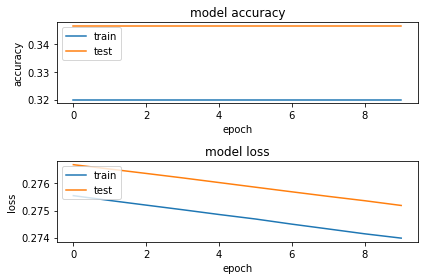

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

plt.tight_layout()
plt.show()  

These graphical reports (after using `verbose=0`) will be very useful for completing this assignment. Use the code above as a template for constructing your graphs. Limited changes should be needed to complete this assignment.

However, let's see how our network performs now on the entire data set. Now that we have trained the network, we can use the `evaluate()` method to determine this information:

In [19]:
score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

150/150 [==============================] - 0s 36us/step
Test loss: 0.2745229613780975
Test accuracy: 0.3333333432674408


In the end, we are only getting 33% of the examples classified correctly! However, we can use one (or more) of the three suggested tricks above for improving the performance of the network. Unless you rebuild the model again from scratch, training can be carried over from previous `fit()` operations. So, if we ran fit again now for another 10 epochs, it would be 20 epochs total of training. However, the history information from the previous 10 epochs may be lost, so be sure to keep records of the training process or restart from scratch if you want to train for more epochs from the very beginning.

Some models _also_ take a long time to evaluate, so the `verbose()` option is available to help determine how long this process takes to complete, but feel free to turn it off by setting it to zero.

## Practice!

Now that you have experienced the *process* for creating a single-layer network, try adjusting the suggested parameters above to learn how to build a single-layer neural network to classify the Iris data set!